In [3]:
# Install imports
!pip install geopandas

     |████████████████████████████████| 921kB 2.7MB/s 
     |████████████████████████████████| 11.9MB 35.3MB/s 
     |████████████████████████████████| 10.1MB 26.5MB/s 


In [0]:
# Imports
import pandas as pd
import numpy as np
import geopandas as gpd
import io
from geopandas import GeoDataFrame
from shapely.geometry import Point, box
from google.colab import files

In [7]:
world_shape = files.upload()

Saving ne_10m_admin_0_countries.cpg to ne_10m_admin_0_countries.cpg
Saving ne_10m_admin_0_countries.dbf to ne_10m_admin_0_countries.dbf
Saving ne_10m_admin_0_countries.prj to ne_10m_admin_0_countries.prj
Saving ne_10m_admin_0_countries.README.html to ne_10m_admin_0_countries.README.html
Saving ne_10m_admin_0_countries.shp to ne_10m_admin_0_countries.shp
Saving ne_10m_admin_0_countries.shx to ne_10m_admin_0_countries.shx
Saving ne_10m_admin_0_countries.VERSION.txt to ne_10m_admin_0_countries.VERSION.txt


In [13]:
wooded_shape = files.upload()

Saving wooded_area_2.cpg to wooded_area_2.cpg
Saving wooded_area_2.dbf to wooded_area_2.dbf
Saving wooded_area_2.prj to wooded_area_2.prj
Saving wooded_area_2.sbn to wooded_area_2.sbn
Saving wooded_area_2.sbx to wooded_area_2.sbx
Saving wooded_area_2.shp to wooded_area_2.shp
Saving wooded_area_2.shx to wooded_area_2.shx


In [10]:
grid_csv = files.upload()

Saving alberta_grid_system.csv to alberta_grid_system.csv


In [0]:
world = gpd.read_file('ne_10m_admin_0_countries.shp')
canada = world[world['SOVEREIGNT'] == 'Canada']

In [14]:
wooded_area = gpd.read_file('wooded_area_2.shp')
wooded_area.head()

,feature_id,datemin,datemax,haccmin,haccmax,dsc,dsc_en,dsc_fr,map_sel,map_sel_en,map_sel_fr,geometry
0,093c2d6d0713480fa9d649bca92ad23d,1969,1984,150.0,150.0,20,Not Identified,Non identifié,71,Dense,Dense,"POLYGON ((-118.61964 57.00006, -118.62627 57.0..."
1,947103d2e81049048dbed477d4cda489,1971,1984,150.0,150.0,20,Not Identified,Non identifié,71,Dense,Dense,"POLYGON ((-120.33315 54.11405, -120.33277 54.1..."
2,2d56211869784a4bacecd325a97e1c0c,1971,1984,150.0,150.0,20,Not Identified,Non identifié,71,Dense,Dense,"POLYGON ((-120.38856 54.12640, -120.38687 54.1..."
3,ae538d582adc4ae3b513a0ee2dfc1e79,1971,1984,150.0,150.0,20,Not Identified,Non identifié,71,Dense,Dense,"POLYGON ((-120.02068 54.17356, -120.01901 54.1..."
4,e80e34841dbe46628b19b44fd2215911,1971,1984,150.0,150.0,20,Not Identified,Non identifié,71,Dense,Dense,"POLYGON ((-120.20622 54.01490, -120.20959 54.0..."


In [15]:
grid = pd.read_csv(io.StringIO(grid_csv['alberta_grid_system.csv'].decode('utf-8')))
grid.head()

,KEY,LATITUDE,LONGITUDE
0,49.0|-113.8,49.0,-113.8
1,49.0|-113.6,49.0,-113.6
2,49.0|-113.0,49.0,-113.0
3,49.0|-112.6,49.0,-112.6
4,49.0|-112.4,49.0,-112.4


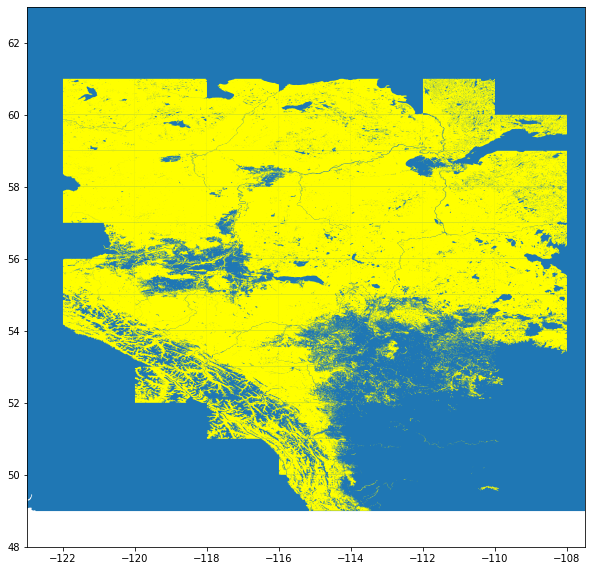

In [16]:
base = canada.plot(figsize=(10,10))
base.set_xlim(-123, -107.5) 
base.set_ylim(48, 63)
wooded_area.plot(
    ax=base, 
    color='yellow', 
    markersize=5);

In [0]:
# Set up grid geometry
def set_shape(row):
    x = row.LONGITUDE
    y = row.LATITUDE 
    return box(x,y,x+0.2,y+0.2) 
    
grid['box'] = grid.apply(lambda row: set_shape(row), axis=1)
box_gdf = GeoDataFrame(grid, geometry=grid['box'])

In [22]:
for index, box in box_gdf.iterrows():
    box_gdf.at[index,'wooded'] = 0
    for index2, wood in wooded_area.iterrows():
        if box['geometry'].intersects(wood['geometry']):
            box_gdf.at[index,'wooded'] = 1
            break

box_gdf.head()

,KEY,LATITUDE,LONGITUDE,box,geometry,wooded
0,49.0|-113.8,49.0,-113.8,"POLYGON ((-113.6 49, -113.6 49.2, -113.8 49.2,...","POLYGON ((-113.60000 49.00000, -113.60000 49.2...",1.0
1,49.0|-113.6,49.0,-113.6,"POLYGON ((-113.4 49, -113.4 49.2, -113.6 49.2,...","POLYGON ((-113.40000 49.00000, -113.40000 49.2...",1.0
2,49.0|-113.0,49.0,-113.0,"POLYGON ((-112.8 49, -112.8 49.2, -113 49.2, -...","POLYGON ((-112.80000 49.00000, -112.80000 49.2...",0.0
3,49.0|-112.6,49.0,-112.6,"POLYGON ((-112.4 49, -112.4 49.2, -112.6 49.2,...","POLYGON ((-112.40000 49.00000, -112.40000 49.2...",0.0
4,49.0|-112.4,49.0,-112.4,"POLYGON ((-112.2 49, -112.2 49.2, -112.4 49.2,...","POLYGON ((-112.20000 49.00000, -112.20000 49.2...",0.0


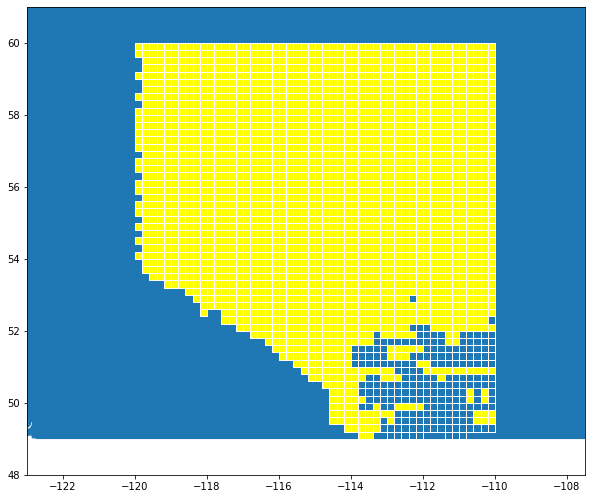

In [25]:
base = canada.plot(figsize=(10,10))
base.set_xlim(-123, -107.5) 
base.set_ylim(48, 61)
base = box_gdf[box_gdf['wooded'] == 0].plot(
    ax=base, 
    edgecolor='white', 
    markersize=5);

box_gdf[box_gdf['wooded'] == 1].plot(
    ax=base, 
    edgecolor='white', 
    color='yellow',
    markersize=5);

In [0]:
box_gdf.to_csv('AL_grid_wooded.csv')

In [0]:
files.download('AL_grid_wooded.csv')

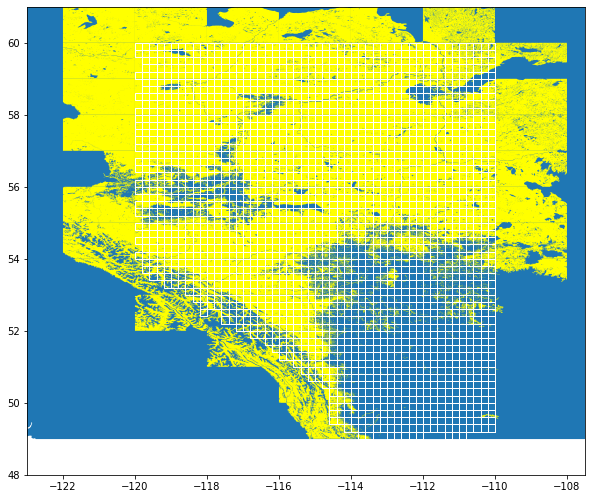

In [38]:
base = canada.plot(figsize=(10,10))
base.set_xlim(-123, -107.5) 
base.set_ylim(48, 61)
base = wooded_area.plot(
    ax=base, 
    color='yellow', 
    markersize=5);

box_gdf.plot(
    ax=base, 
    fc=(0,0,0,0),
    edgecolor='white', 
    markersize=5);